# Simulating a spring mass system with python

Here we do a very simple simulator of a basic spring mass system (a.k.a. damped forced oscillator, https://en.wikipedia.org/wiki/Harmonic_oscillator), i.e., a system whose ODE is defined as:

In [5]:
def u(t, T):
    # define the behavior of the motor
    if t < T:
        u = 0
    else:
        u = 1
    return u
    

def myModel(y, t, T):
    #
    # parameters
    f = 0.1 # friction
    k = 0.5 # stiffnes
    m = 0.4 # mass
    #
    # get the individual variables - for readability
    pos = y[0] # position
    vel = y[1] # velocity
    #
    # compute individual derivatives
    dposdt  = vel # d position / d t = velocity
    dveldt  = - (f / m) * vel - (k / m) * pos + (1 / m) * u(t, T) # from Newton
    #
    return [ dposdt, dveldt ]

where $u(t)$ is a function of $t$ that has to be defined somewhere and that corresponds to a controllable force that some motor can give to the mass. Note that one may extend the code above to include a disturbance $d(t)$ or $d(x)$ accordingly.

The code below will thus define the various variables needed to run the simulation.

In [2]:
# load the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [6]:
# define the initial condition
y0 = [ 2, 5 ]

# define the time points where the solution is computed
n    = 100
tmax = 20
t    = np.linspace(0, tmax, n)

# define whether to activate the motor or not
T    = 5

Solve the ODE via the ` scipy.integrate.odeint ` function, and plot the results:

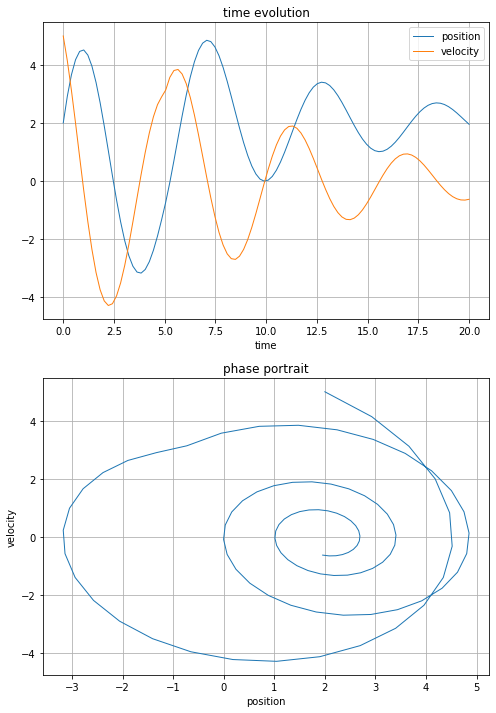

In [7]:
# solve the ODE
y = odeint(myModel, y0, t, args=(T,))

# get the individual variables
pos = y[:,0]
vel = y[:,1]

# create two subfigures (stacked vertically)
fig, ax = plt.subplots(2, 1, figsize=(8,12))

# plot the time evolution
ax[0].plot(t, pos, label='position', linewidth=1)
ax[0].plot(t, vel, label='velocity', linewidth=1)
ax[0].grid()
ax[0].legend(loc = 'upper right')
ax[0].set_xlabel('time')
ax[0].set_title('time evolution')

# plot the phase portrait
ax[1].plot(pos, vel, linewidth=1)
ax[1].grid()
ax[1].set_xlabel('position')
ax[1].set_ylabel('velocity')
ax[1].set_title('phase portrait')

plt.show()